In [49]:
%pylab inline
import pandas as pd
import os
path = os.getcwd()
path1 = path + '/agg-infoLOG.csv'
path2 = path + '/agg-LOG.csv'
path3 = path + '/agg-LOGTARGET.csv'

targetData = pd.read_csv(path3, header=None, names = ["Person", "Turn", "Rest"])
reData = pd.read_csv(path1, header=None, names = ["Rest", "Votazione", "Capacity"])

s = pd.Series(['Person', 'Turn'])
t = reData["Rest"]
p = s.append(t)
data = pd.read_csv(path2, header=None ,names = p)


PERSONE = data['Person']
RISTORANTI = reData['Rest']

Populating the interactive namespace from numpy and matplotlib


## Plot media votazione ristoranti

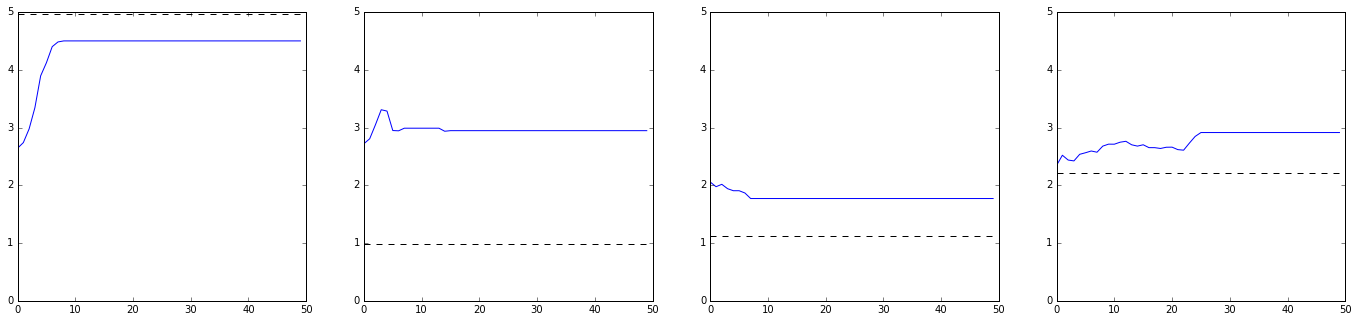

In [15]:
dic = {}
for re in RISTORANTI:
    Y=[]
    for i in range(1, max(data['Turn']+1 )):
        Y.append(mean((data.loc[data['Turn'] == i])[re]))
    dic[re] = Y

figure(figsize=(30,30))
i = 0
for key in dic.keys():
    y = dic[key]
    i += 1
    ax = subplot(5,5,i)
    ax.plot(y)    
    ax.hlines((reData.loc[reData['Rest'] == key]['Votazione'].values[0]), 0, max(data['Turn']-1), linestyles='dashed')
    ax.set_ylim([0,5])

## Select Re and Pe

In [6]:
person = 'Person 1'
restaurant = 'Restaurant 1'

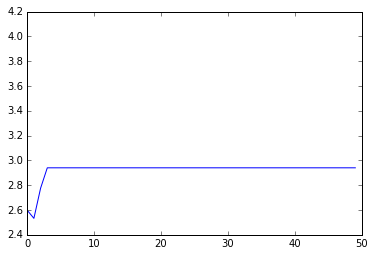

In [7]:
Y=[]
for i in range(1, max(data['Turn']+1 )):
    Y.append(data.loc[data['Turn'] == i].loc[data['Person'] == person][restaurant])
    dic[re] = Y    
plt.plot(y)
plt.hlines((reData.loc[reData['Rest'] == restaurant]['Votazione'].values[0]), 0, max(data['Turn']-1), linestyles='dashed')

## Person all Re

In [8]:
person = 'Person 2'

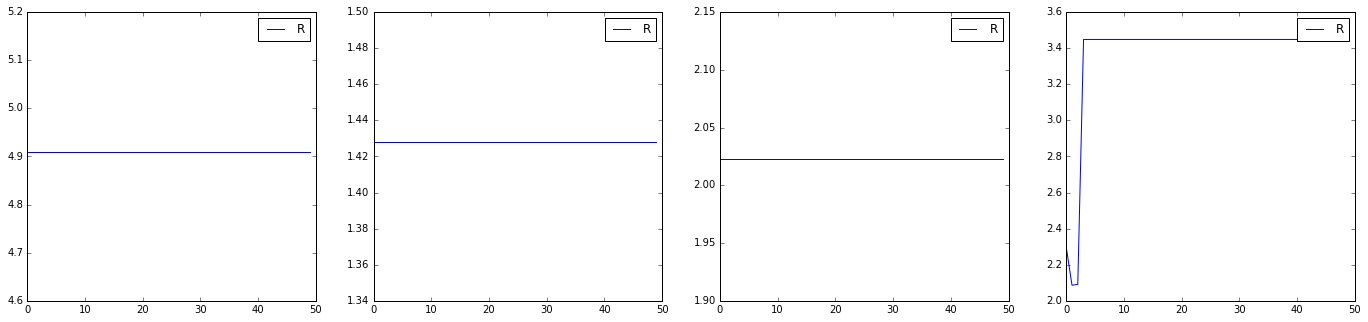

In [9]:
dic = {}
for re in RISTORANTI:
    Y=[]
    for i in range(1, max(data['Turn']+1 )):
        Y.append((data.loc[data['Person'] == person].loc[data['Turn'] == i][re]).values[0])
    dic[re] = Y

figure(figsize=(30,30))
i = 0
for key in dic.keys():
    y = dic[key]
    i += 1
    ax = subplot(5,5,i)
    ax.plot(y)
    legend(key)

## Re num persone

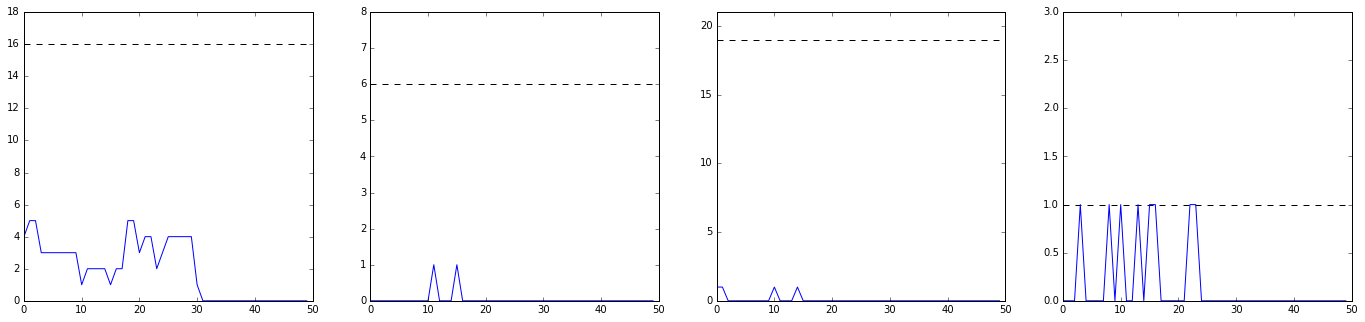

In [53]:
dic = {}
for re in RISTORANTI:
    Y=[]
    for i in range(1, max(data['Turn']+1 )):
        a = targetData.loc[targetData["Rest"] == re].loc[targetData["Turn"] == i]
        Y.append(a.shape[0])
    dic[re] = Y

figure(figsize=(30,30))
i = 0
for key in dic.keys():
    y = dic[key]
    i += 1
    ax = subplot(5,5,i)
    ax.hlines((reData.loc[reData['Rest'] == key]['Capacity'].values[0]), 0, max(data['Turn']-1), linestyles='dashed')
    ax.set_ylim([0,(reData.loc[reData['Rest'] == key]['Capacity'].values[0])+2])
    ax.plot(y)


In [52]:
reData

,Rest,Votazione,Capacity
0,Restaurant 3,3.530440,1
1,Restaurant 0,4.105038,6
2,Restaurant 2,4.114415,16
3,Restaurant 1,1.371385,19
